## Pre-Processing & Training Data Development

Goals:
- Create dummy or indicator features for categorical variables
- Standardize the magnitude of numeric features using a scaler
- Split data into testing and training datasets

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import scipy
import pandas.util.testing as tm
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<ipython-input-1-ea8b2f27c408>:8: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv(r'C:\Users\yuvem\OneDrive\Documents\GitHub\Preprocess and training\final_tripdata.csv\final_tripdata.csv')
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_week_start,duration,distance
0,000001004784CD35,docked_bike,2020-07-22 15:38:23,2020-07-22 15:56:47,Wolcott (Ravenswood) Ave & Montrose Ave,238,Southport Ave & Clybourn Ave,307,41.961406,-87.676169,41.920771,-87.663712,casual,4.0,1824.0,42501.53
1,000002EBE159AE82,electric_bike,2021-06-22 17:25:15,2021-06-22 17:31:34,Clinton St & Jackson Blvd,638,Milwaukee Ave & Grand Ave,13033,41.878261,-87.641155,41.891495,-87.648179,member,3.0,619.0,14982.48
2,00000550C665101A,docked_bike,2020-06-06 15:20:01,2020-06-06 16:28:09,Sheffield Ave & Waveland Ave,114,Kedzie Ave & Milwaukee Ave,260,41.949399,-87.654529,41.929567,-87.707857,casual,7.0,10808.0,56896.25
3,0000127970C84F62,docked_bike,2020-05-30 06:36:36,2020-05-30 06:55:28,Green St & Madison St,198,Wells St & Concord Ln,289,41.881900,-87.648800,41.912100,-87.634700,member,7.0,1892.0,33329.42
4,00001A81D056B01B,classic_bike,2021-04-14 08:10:11,2021-04-14 08:19:14,Wood St & Hubbard St,13432,Morgan St & Lake St,TA1306000015,41.889899,-87.671473,41.885483,-87.652305,member,4.0,903.0,19670.18


Our objective is to give the stakeholders for our company, Cyclistic, the optimal marketing decision to convert casual riders into members. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5515094 entries, 0 to 5515093
Data columns (total 16 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
 13  day_week_start      float64
 14  duration            float64
 15  distance            float64
dtypes: float64(7), object(9)
memory usage: 673.2+ MB


In [4]:
df.isnull().sum()

ride_id                    0
rideable_type              1
started_at                 1
ended_at                   1
start_station_name    282069
start_station_id      282695
end_station_name      315999
end_station_id        316460
start_lat                  1
start_lng                  1
end_lat                    1
end_lng                    1
member_casual              1
day_week_start             1
duration                   1
distance                   1
dtype: int64

In [5]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='%', ascending=False)

,count,%
end_station_id,316460,5.738071
end_station_name,315999,5.729712
start_station_id,282695,5.125842
start_station_name,282069,5.114491
rideable_type,1,0.000018
started_at,1,0.000018
ended_at,1,0.000018
start_lat,1,0.000018
start_lng,1,0.000018
end_lat,1,0.000018


In [6]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
day_week_start        float64
duration              float64
distance              float64
dtype: object

### Conversions

In [7]:
df['day_week_start'].unique()

array([ 4.,  3.,  7.,  1.,  5.,  6.,  2., nan])

In [8]:
df['day_week_start'] = df['day_week_start'].fillna(0)

In [9]:
df['day_week_start'].unique()

array([4., 3., 7., 1., 5., 6., 2., 0.])

In [10]:
df['day_week_start'] = df['day_week_start'].astype(int)

In [11]:
df['day_week_start'].dtype

dtype('int32')

In [12]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_week_start,duration,distance
0,000001004784CD35,docked_bike,2020-07-22 15:38:23,2020-07-22 15:56:47,Wolcott (Ravenswood) Ave & Montrose Ave,238,Southport Ave & Clybourn Ave,307,41.961406,-87.676169,41.920771,-87.663712,casual,4,1824.0,42501.53
1,000002EBE159AE82,electric_bike,2021-06-22 17:25:15,2021-06-22 17:31:34,Clinton St & Jackson Blvd,638,Milwaukee Ave & Grand Ave,13033,41.878261,-87.641155,41.891495,-87.648179,member,3,619.0,14982.48
2,00000550C665101A,docked_bike,2020-06-06 15:20:01,2020-06-06 16:28:09,Sheffield Ave & Waveland Ave,114,Kedzie Ave & Milwaukee Ave,260,41.949399,-87.654529,41.929567,-87.707857,casual,7,10808.0,56896.25
3,0000127970C84F62,docked_bike,2020-05-30 06:36:36,2020-05-30 06:55:28,Green St & Madison St,198,Wells St & Concord Ln,289,41.881900,-87.648800,41.912100,-87.634700,member,7,1892.0,33329.42
4,00001A81D056B01B,classic_bike,2021-04-14 08:10:11,2021-04-14 08:19:14,Wood St & Hubbard St,13432,Morgan St & Lake St,TA1306000015,41.889899,-87.671473,41.885483,-87.652305,member,4,903.0,19670.18


In [13]:
df['hour'] = pd.to_datetime(df['started_at']).dt.time

In [14]:
df['hour'].head()

0    15:38:23
1    17:25:15
2    15:20:01
3    06:36:36
4    08:10:11
Name: hour, dtype: object

In [15]:
df['hour'].unique()

array([datetime.time(15, 38, 23), datetime.time(17, 25, 15),
       datetime.time(15, 20, 1), ..., datetime.time(4, 24, 32),
       datetime.time(4, 39, 51), NaT], dtype=object)

In [16]:
df['day'] = pd.to_datetime(df['started_at']).dt.date

In [17]:
df = df.drop(columns='started_at')

In [18]:
df.head()

,ride_id,rideable_type,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_week_start,duration,distance,hour,day
0,000001004784CD35,docked_bike,2020-07-22 15:56:47,Wolcott (Ravenswood) Ave & Montrose Ave,238,Southport Ave & Clybourn Ave,307,41.961406,-87.676169,41.920771,-87.663712,casual,4,1824.0,42501.53,15:38:23,2020-07-22
1,000002EBE159AE82,electric_bike,2021-06-22 17:31:34,Clinton St & Jackson Blvd,638,Milwaukee Ave & Grand Ave,13033,41.878261,-87.641155,41.891495,-87.648179,member,3,619.0,14982.48,17:25:15,2021-06-22
2,00000550C665101A,docked_bike,2020-06-06 16:28:09,Sheffield Ave & Waveland Ave,114,Kedzie Ave & Milwaukee Ave,260,41.949399,-87.654529,41.929567,-87.707857,casual,7,10808.0,56896.25,15:20:01,2020-06-06
3,0000127970C84F62,docked_bike,2020-05-30 06:55:28,Green St & Madison St,198,Wells St & Concord Ln,289,41.881900,-87.648800,41.912100,-87.634700,member,7,1892.0,33329.42,06:36:36,2020-05-30
4,00001A81D056B01B,classic_bike,2021-04-14 08:19:14,Wood St & Hubbard St,13432,Morgan St & Lake St,TA1306000015,41.889899,-87.671473,41.885483,-87.652305,member,4,903.0,19670.18,08:10:11,2021-04-14


In [19]:
df['end_hour'] = pd.to_datetime(df['ended_at']).dt.time

In [20]:
df = df.drop(columns='ended_at')

In [21]:
df.head()

,ride_id,rideable_type,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_week_start,duration,distance,hour,day,end_hour
0,000001004784CD35,docked_bike,Wolcott (Ravenswood) Ave & Montrose Ave,238,Southport Ave & Clybourn Ave,307,41.961406,-87.676169,41.920771,-87.663712,casual,4,1824.0,42501.53,15:38:23,2020-07-22,15:56:47
1,000002EBE159AE82,electric_bike,Clinton St & Jackson Blvd,638,Milwaukee Ave & Grand Ave,13033,41.878261,-87.641155,41.891495,-87.648179,member,3,619.0,14982.48,17:25:15,2021-06-22,17:31:34
2,00000550C665101A,docked_bike,Sheffield Ave & Waveland Ave,114,Kedzie Ave & Milwaukee Ave,260,41.949399,-87.654529,41.929567,-87.707857,casual,7,10808.0,56896.25,15:20:01,2020-06-06,16:28:09
3,0000127970C84F62,docked_bike,Green St & Madison St,198,Wells St & Concord Ln,289,41.881900,-87.648800,41.912100,-87.634700,member,7,1892.0,33329.42,06:36:36,2020-05-30,06:55:28
4,00001A81D056B01B,classic_bike,Wood St & Hubbard St,13432,Morgan St & Lake St,TA1306000015,41.889899,-87.671473,41.885483,-87.652305,member,4,903.0,19670.18,08:10:11,2021-04-14,08:19:14


In [22]:
df_final = df[['ride_id','rideable_type','start_station_name','end_station_name','member_casual','duration','distance','day_week_start','day','hour']]

In [23]:
df_final.head()

,ride_id,rideable_type,start_station_name,end_station_name,member_casual,duration,distance,day_week_start,day,hour
0,000001004784CD35,docked_bike,Wolcott (Ravenswood) Ave & Montrose Ave,Southport Ave & Clybourn Ave,casual,1824.0,42501.53,4,2020-07-22,15:38:23
1,000002EBE159AE82,electric_bike,Clinton St & Jackson Blvd,Milwaukee Ave & Grand Ave,member,619.0,14982.48,3,2021-06-22,17:25:15
2,00000550C665101A,docked_bike,Sheffield Ave & Waveland Ave,Kedzie Ave & Milwaukee Ave,casual,10808.0,56896.25,7,2020-06-06,15:20:01
3,0000127970C84F62,docked_bike,Green St & Madison St,Wells St & Concord Ln,member,1892.0,33329.42,7,2020-05-30,06:36:36
4,00001A81D056B01B,classic_bike,Wood St & Hubbard St,Morgan St & Lake St,member,903.0,19670.18,4,2021-04-14,08:10:11


## Convert categorical variable, member_casual, into indicator variables or dummy

In [24]:
member_subset = df_final[['rideable_type','member_casual', 'distance']]

In [25]:
member_dummies = pd.get_dummies(member_subset.member_casual, prefix='member_casual') 
ds = pd.concat([member_subset, member_dummies], axis = 1)

In [26]:
ds

,rideable_type,member_casual,distance,member_casual_casual,member_casual_member
0,docked_bike,casual,42501.53,1,0
1,electric_bike,member,14982.48,0,1
2,docked_bike,casual,56896.25,1,0
3,docked_bike,member,33329.42,0,1
4,classic_bike,member,19670.18,0,1
...,...,...,...,...,...
5515089,docked_bike,member,46660.08,0,1
5515090,docked_bike,member,8525.92,0,1
5515091,classic_bike,member,63716.35,0,1
5515092,electric_bike,member,105891.78,0,1


In [27]:
ds = ds[ds['member_casual'].notna()]

In [28]:
ds

,rideable_type,member_casual,distance,member_casual_casual,member_casual_member
0,docked_bike,casual,42501.53,1,0
1,electric_bike,member,14982.48,0,1
2,docked_bike,casual,56896.25,1,0
3,docked_bike,member,33329.42,0,1
4,classic_bike,member,19670.18,0,1
...,...,...,...,...,...
5515088,docked_bike,member,45394.79,0,1
5515089,docked_bike,member,46660.08,0,1
5515090,docked_bike,member,8525.92,0,1
5515091,classic_bike,member,63716.35,0,1


In [29]:
# Do the same thing for rideable_type
ride_dummies = pd.get_dummies(ds.rideable_type, prefix='rideable_type', drop_first=True) 
ds = pd.concat([ds, ride_dummies], axis = 1)
ds.head()

,rideable_type,member_casual,distance,member_casual_casual,member_casual_member,rideable_type_docked_bike,rideable_type_electric_bike
0,docked_bike,casual,42501.53,1,0,1,0
1,electric_bike,member,14982.48,0,1,0,1
2,docked_bike,casual,56896.25,1,0,1,0
3,docked_bike,member,33329.42,0,1,1,0
4,classic_bike,member,19670.18,0,1,0,0


In [30]:
ds['rideable_type_docked_bike'].unique()

array([1, 0], dtype=uint8)

In [31]:
ds_ = ds.head(10)

In [32]:
ds_.head()

,rideable_type,member_casual,distance,member_casual_casual,member_casual_member,rideable_type_docked_bike,rideable_type_electric_bike
0,docked_bike,casual,42501.53,1,0,1,0
1,electric_bike,member,14982.48,0,1,0,1
2,docked_bike,casual,56896.25,1,0,1,0
3,docked_bike,member,33329.42,0,1,1,0
4,classic_bike,member,19670.18,0,1,0,0


## Get the numerical values into new dataset

In [33]:
num_set = ds.select_dtypes(include=['int', 'float'])
num_set.head()

,distance
0,42501.53
1,14982.48
2,56896.25
3,33329.42
4,19670.18


In [34]:
data = ds_[['distance','member_casual_casual','member_casual_member','rideable_type_docked_bike','rideable_type_electric_bike']]

In [38]:
# split into inputs and outputs
X, y = data.iloc[:, :-1], ds_.iloc[:, -1]

In [39]:
print(X.shape, y.shape)

(10, 4) (10,)


## Splitting data into train and test set

In [40]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6, 4) (4, 4) (6,) (4,)


In [41]:
from sklearn.ensemble import RandomForestRegressor
# fit the model
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [43]:
# make predictions
y_hat = model.predict(X_test)

<AxesSubplot:xlabel='rideable_type_electric_bike', ylabel='Density'>

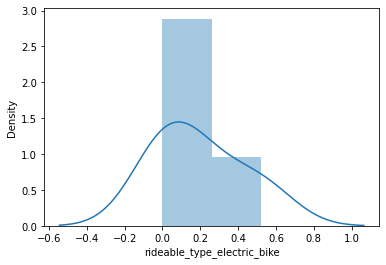

In [44]:
sns.distplot(y_hat-y_test)

## Using Standard Scaler on numeric features 

In [45]:
# use df_final to create subset called 

num_subset = df_final[['rideable_type','distance','day_week_start']]
num_subset.head()

,rideable_type,distance,day_week_start
0,docked_bike,42501.53,4
1,electric_bike,14982.48,3
2,docked_bike,56896.25,7
3,docked_bike,33329.42,7
4,classic_bike,19670.18,4


In [46]:
num_subset.isnull().sum()

rideable_type     1
distance          1
day_week_start    0
dtype: int64

In [50]:
num_subset = num_subset[num_subset['rideable_type'].notna()]

In [51]:
num_subset.isnull().sum()

rideable_type     0
distance          0
day_week_start    0
dtype: int64

### Splitting data into train and test set - again

In [98]:
x = num_subset.iloc[:, -1].values
y = num_subset.iloc[:, 1].values

In [99]:
y

array([ 42501.53,  14982.48,  56896.25, ...,   8525.92,  63716.35,
       105891.78])

In [100]:
x

array([4, 3, 7, ..., 2, 4, 2])

In [101]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [102]:
X_train= X_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [104]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

scaler_x = StandardScaler()
scaler_y = StandardScaler()
regressor = LinearRegression()
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)

In [105]:
#Xs = scaler_x.fit_transform(X_test)
#Ys = np.squeeze(scaler_y.fit_transform(y_test.reshape(-1, 1)))

In [106]:
#from sklearn.linear_model import LinearRegression

#models = LinearRegression()
#models.fit(Xs, Ys)

In [107]:
y_pred = models.predict(Xs)
y_pred

array([-0.00078377,  0.01894237, -0.00078377, ..., -0.00735916,
        0.01236699, -0.00078377])

<AxesSubplot:ylabel='Density'>

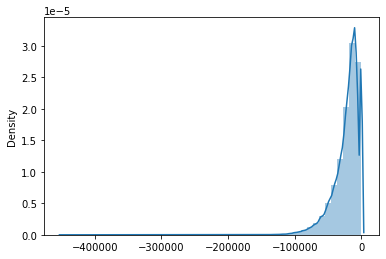

In [110]:
sns.distplot(y_pred-y_test)